In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

customers_path = r'C:\Users\saihg\Downloads\Customers.csv'
products_path = r'C:\Users\saihg\Downloads\Products.csv'
transactions_path = r'C:\Users\saihg\Downloads\Transactions.csv'

customers_df = pd.read_csv(customers_path)
products_df = pd.read_csv(products_path)
transactions_df = pd.read_csv(transactions_path)

customers_df.head(), products_df.head(), transactions_df.head()


(  CustomerID        CustomerName         Region  SignupDate
 0      C0001    Lawrence Carroll  South America  2022-07-10
 1      C0002      Elizabeth Lutz           Asia  2022-02-13
 2      C0003      Michael Rivera  South America  2024-03-07
 3      C0004  Kathleen Rodriguez  South America  2022-10-09
 4      C0005         Laura Weber           Asia  2022-08-15,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55    

In [8]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left").merge(products_df, on="ProductID", how="left")

merged_df.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [9]:
summary_stats = merged_df.describe()

unique_customers = merged_df['CustomerID'].nunique()
unique_products = merged_df['ProductID'].nunique()
total_transactions = merged_df['TransactionID'].nunique()

transactions_by_region = merged_df['Region'].value_counts()

revenue_by_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

transactions_over_time = merged_df['TransactionDate'].dt.to_period('M').value_counts().sort_index()

summary_stats, unique_customers, unique_products, total_transactions, transactions_by_region, revenue_by_category, transactions_over_time.head()


(                     TransactionDate     Quantity   TotalValue     Price_x  \
 count                           1000  1000.000000  1000.000000  1000.00000   
 mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
 min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
 25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
 50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
 75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
 max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
 std                              NaN     1.117981   493.144478   140.73639   
 
                           SignupDate     Price_y  
 count                           1000  1000.00000  
 mean   2023-07-09 02:49:55.199999744   272.55407  
 min              2022-01-22 00:00:00    16.08000  
 25%              2022-09-17 12:00:00   147.95000  
 50%              2023-07-2

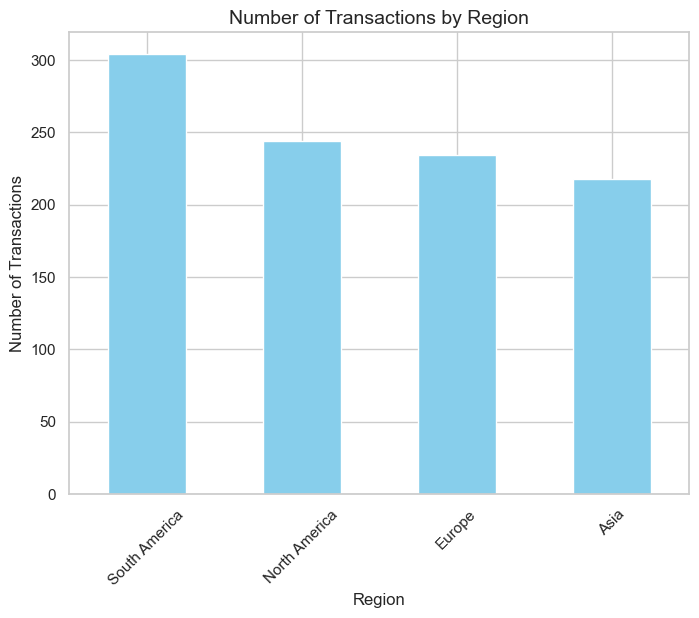

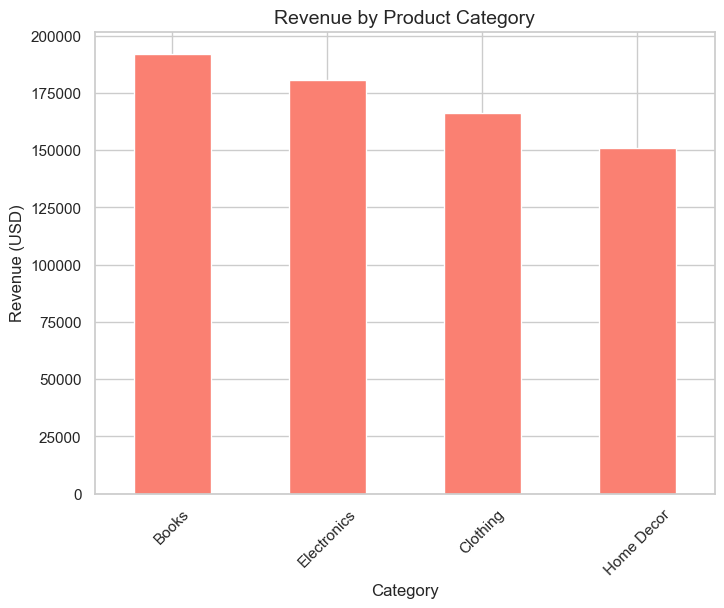

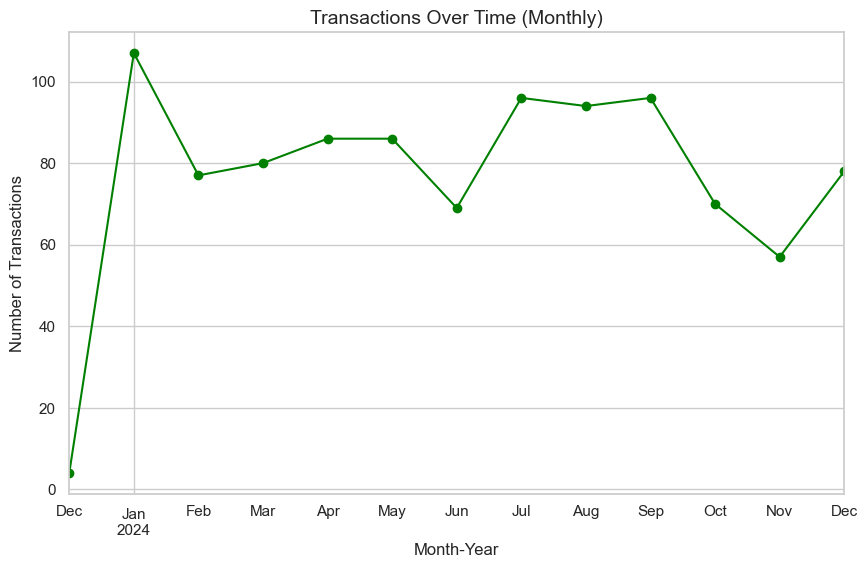

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual styles
sns.set(style="whitegrid")

# Plot: Transactions by Region
plt.figure(figsize=(8, 6))
transactions_by_region.plot(kind="bar", color="skyblue")
plt.title("Number of Transactions by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Plot: Revenue by Product Category
plt.figure(figsize=(8, 6))
revenue_by_category.plot(kind="bar", color="salmon")
plt.title("Revenue by Product Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Revenue (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Plot: Transactions Over Time
plt.figure(figsize=(10, 6))
transactions_over_time.plot(kind="line", marker='o', color="green")
plt.title("Transactions Over Time (Monthly)", fontsize=14)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.grid(True)
plt.show()
